# ▼Viz作成

In [70]:
# ライブラリのインポート
from pandas_datareader import data
import pandas_datareader.stooq as web
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import talib as ta
from datetime import datetime
import mplfinance as mpf
%matplotlib inline

In [2]:
# 日経平均のデータを取得
st = datetime(2021, 7, 11)
ed = datetime(2022, 7, 10)

df = data.DataReader('^N225', 'yahoo', start=st, end=ed)

In [3]:
# column名を変更
data = df.index
price = df['Adj Close']

/root/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


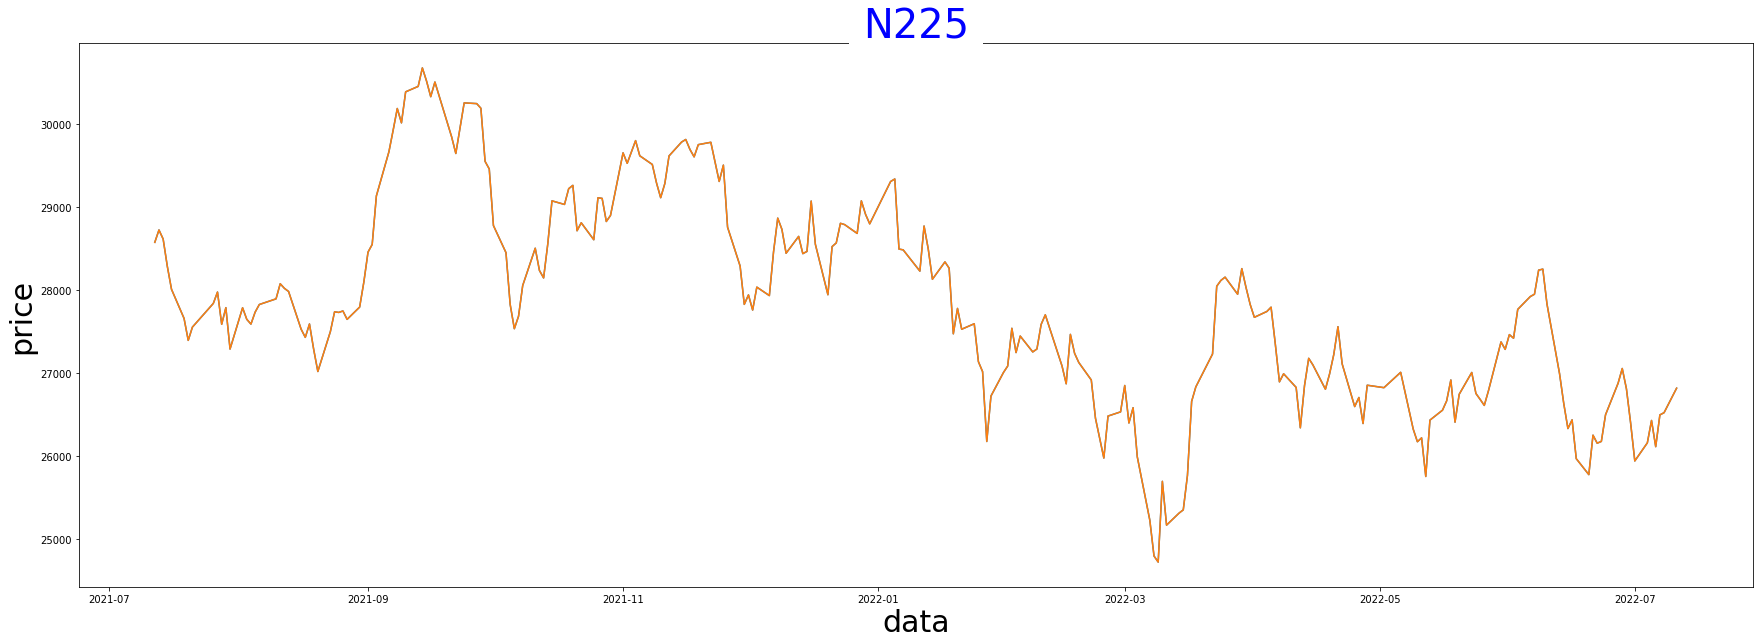

In [4]:
# 描画
plt.figure(figsize=(30, 10))

# ラベルを表示
plt.plot(data, price, label='Nikkei225')

# グラフタイトルを付ける
plt.title('N225', color='blue', backgroundcolor='white', size=40, loc='center')

# ラベルの名前付け
plt.xlabel('data', color='black', size=30)
plt.ylabel('price', color='black', size=30)

plt.plot(data, price)

In [5]:
# 単純移動平均の指標を追加
# 変数の定義
span01 =  5
span02 = 25
span03 = 50

# 移動平均を算出
df["sma01"] =  price.rolling(window=span01).mean()
df["sma02"] =  price.rolling(window=span02).mean()
df["sma03"] =  price.rolling(window=span03).mean()

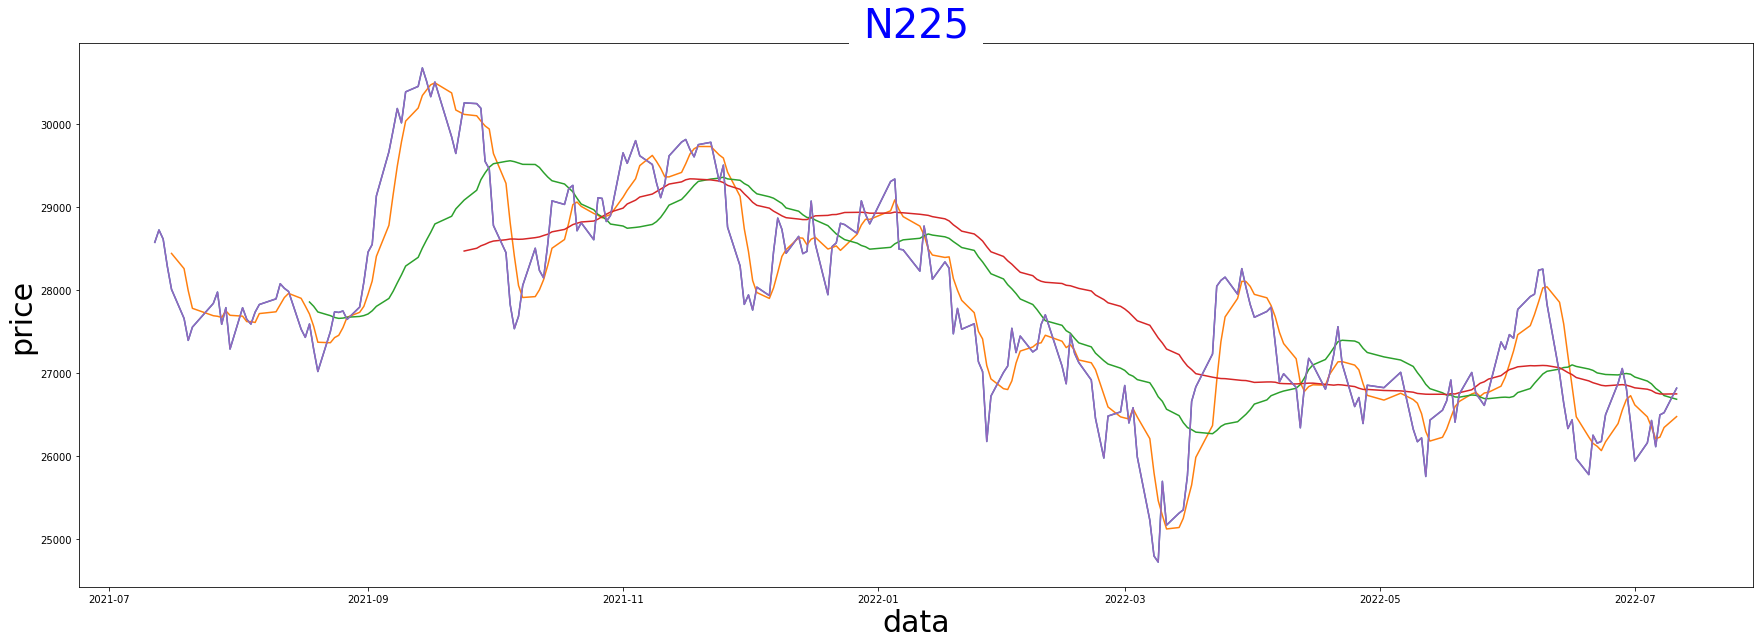

In [6]:
# グラフの描画
plt.figure(figsize=(30, 10))

# ラベルを表示
plt.plot(data, price, label='Nikkei225')

# smaを追加
plt.plot(data,df['sma01'], label='sma01')
plt.plot(data,df['sma02'], label='sma02')
plt.plot(data,df['sma03'], label='sma03')

# グラフタイトルを付ける
plt.title('N225', color='blue', backgroundcolor='white', size=40, loc='center')

# ラベルの名前付け
plt.xlabel('data', color='black', size=30)
plt.ylabel('price', color='black', size=30)

plt.plot(data, price)

In [7]:
# データの確認
df.head()

,High,Low,Open,Close,Volume,Adj Close,sma01,sma02,sma03
Date,,,,,,,,,
2021-07-12,28595.119141,28405.599609,28412.699219,28569.019531,55500000,28569.019531,NaN,NaN,NaN
2021-07-13,28852.310547,28699.039062,28713.820312,28718.240234,49800000,28718.240234,NaN,NaN,NaN
2021-07-14,28696.800781,28482.820312,28517.310547,28608.490234,54800000,28608.490234,NaN,NaN,NaN
2021-07-15,28571.720703,28240.210938,28539.320312,28279.089844,53200000,28279.089844,NaN,NaN,NaN
2021-07-16,28201.300781,27847.349609,28039.259766,28003.080078,50400000,28003.080078,28435.583984,NaN,NaN


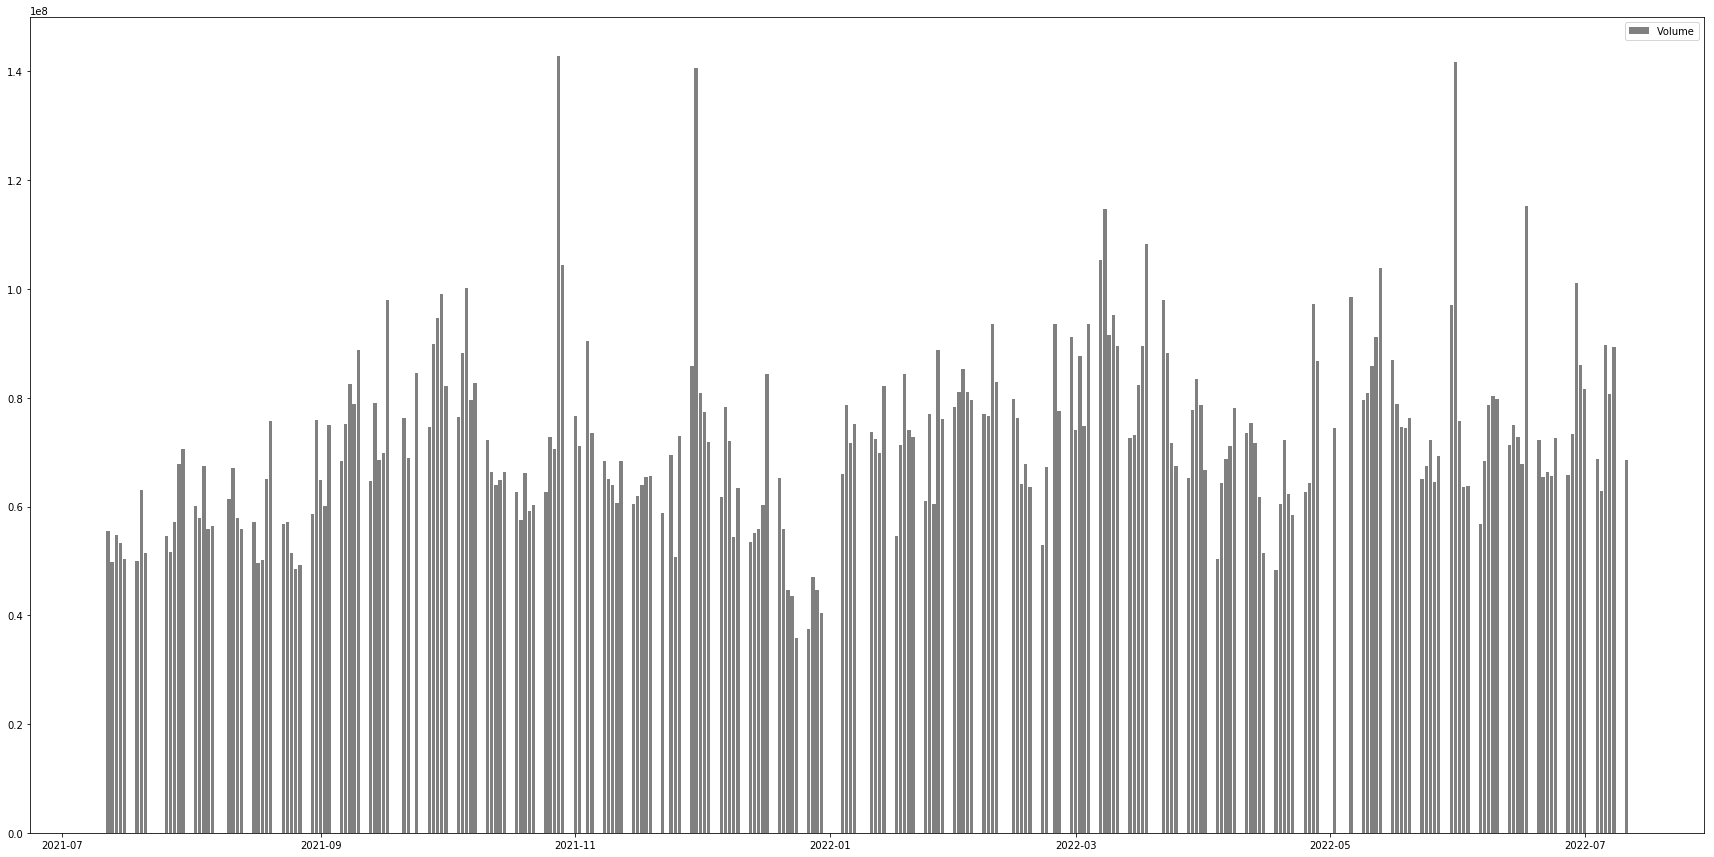

In [8]:
# 出来高を棒グラフで描画
plt.figure(figsize=(30, 15))
plt.bar(data, df['Volume'], label='Volume', color='grey')

plt.legend()

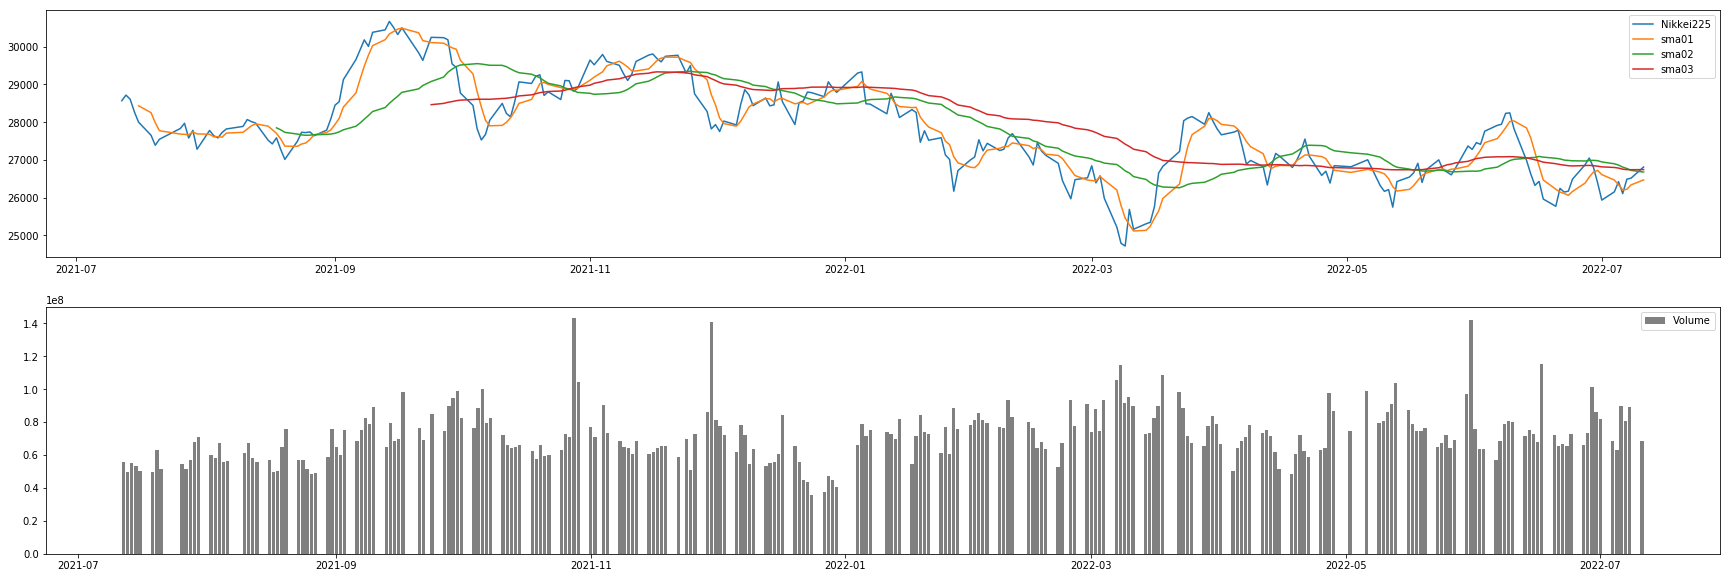

In [9]:
# 線グラフと棒グラフを描画
plt.figure(figsize=(30, 10))

# グラフ領域を2分割
plt.subplot(2, 1, 1)

# ラベルを表示
plt.plot(data, price, label='Nikkei225')

# smaを追加
plt.plot(data,df['sma01'], label='sma01')
plt.plot(data,df['sma02'], label='sma02')
plt.plot(data,df['sma03'], label='sma03')
plt.legend()

plt.subplot(2, 1, 2)
plt.bar(data, df['Volume'], label='Volume', color='grey')
plt.legend()

In [11]:
# 日本企業の個別銘柄の株の取得
# リクルートホールディングス
in_brand = web.StooqDailyReader('6098.JP').read()

In [12]:
# columnの並び替え
in_brand = in_brand.sort_index()

In [13]:
# データの確認
in_brand.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-19,1916.13,1948.46,1906.34,1943.56,6589804
2017-07-20,1948.46,1976.83,1943.56,1968.04,5129103
2017-07-21,1958.23,1969.00,1938.64,1943.56,2566390
2017-07-24,1934.74,1943.56,1921.04,1936.70,2328114
2017-07-25,1955.29,1957.27,1928.86,1931.81,2250290


In [14]:
# 日付けでデータの範囲を絞り込む
in_brand = in_brand[in_brand.index>='2021-07-07 00:00:00']

In [15]:
# 関数の記述
def company_stock(st, ed, company_code):
    in_brand = web.StooqDailyReader(company_code).read()
    in_brand = in_brand[(in_brand.index>=st) & (in_brand.index<=ed)] 
    
    #変数の定義
    date = in_brand.index
    price = in_brand['Close']

    span01 = 5
    span02 = 25
    span03 = 50

    # 移動平均を算出
    in_brand["sma01"] =  price.rolling(window=span01).mean()
    in_brand["sma02"] =  price.rolling(window=span02).mean()
    in_brand["sma03"] =  price.rolling(window=span03).mean()

    # 線グラフと棒グラフを描画
    plt.figure(figsize=(20, 10))

    # グラフ領域を2分割
    plt.subplot(2, 1, 1)

    # smaを追加
    plt.plot(date,in_brand['sma01'], label='sma01')
    plt.plot(date,in_brand['sma02'], label='sma02')
    plt.plot(date,in_brand['sma03'], label='sma03')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.bar(date, in_brand['Volume'], label='Volume', color='grey')
    plt.legend()

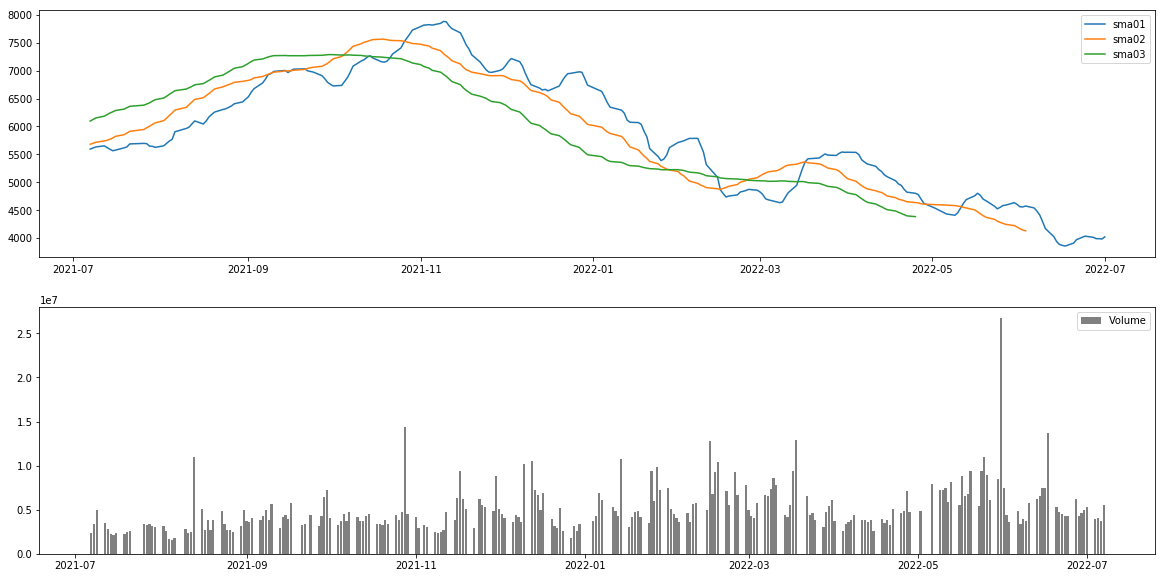

In [16]:
company_stock('2021-07-07', '2022-07-07', '6098.JP')

# ▼テニカル指標（MACD）
- トレンドを見る指標
- 0以上なら上昇トレンド
- 0以下なら下降トレンド

In [40]:
# 変数の代入
date = df.index
close = df['Adj Close']

In [41]:
# カラムの作成
df['macd'], df['macdsignal'], df['macdhist'] = ta.MACD(close, 
                                                       fastperiod = 12, #短期の移動平均
                                                       slowperiod = 26, #長期の移動平均 
                                                       signalperiod = 9 #MACDシグナル
                                                       )

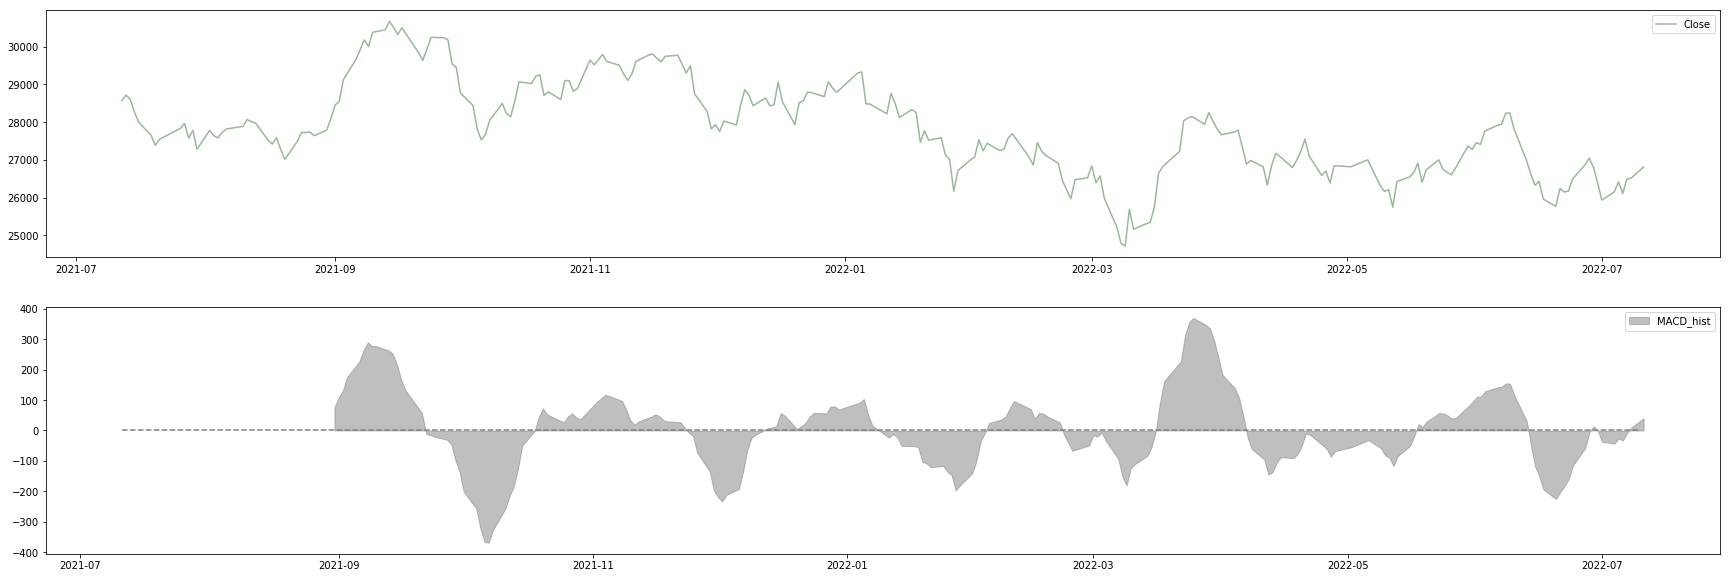

In [45]:
# グラフの描画
plt.figure(figsize=(30, 10))

# グラフ領域を2分割
plt.subplot(2, 1, 1)

plt.plot(date, close, label='Close', color='#99b898')
plt.legend()

# MACDを描画
plt.subplot(2, 1, 2)
plt.fill_between(date, df['macdhist'], color = 'grey', alpha=0.5, label='MACD_hist')
plt.hlines(0, st, ed, 'gray', linestyles='dashed')
plt.legend()

# ▼テニカル指標（RSI）
- 20%~30%を下回る（売られ過ぎ） 
- 70%~80%を上回る（買われ過ぎ）

In [44]:
# カラムの作成
df['RSI'] = ta.RSI(close, timeperiod=span02)

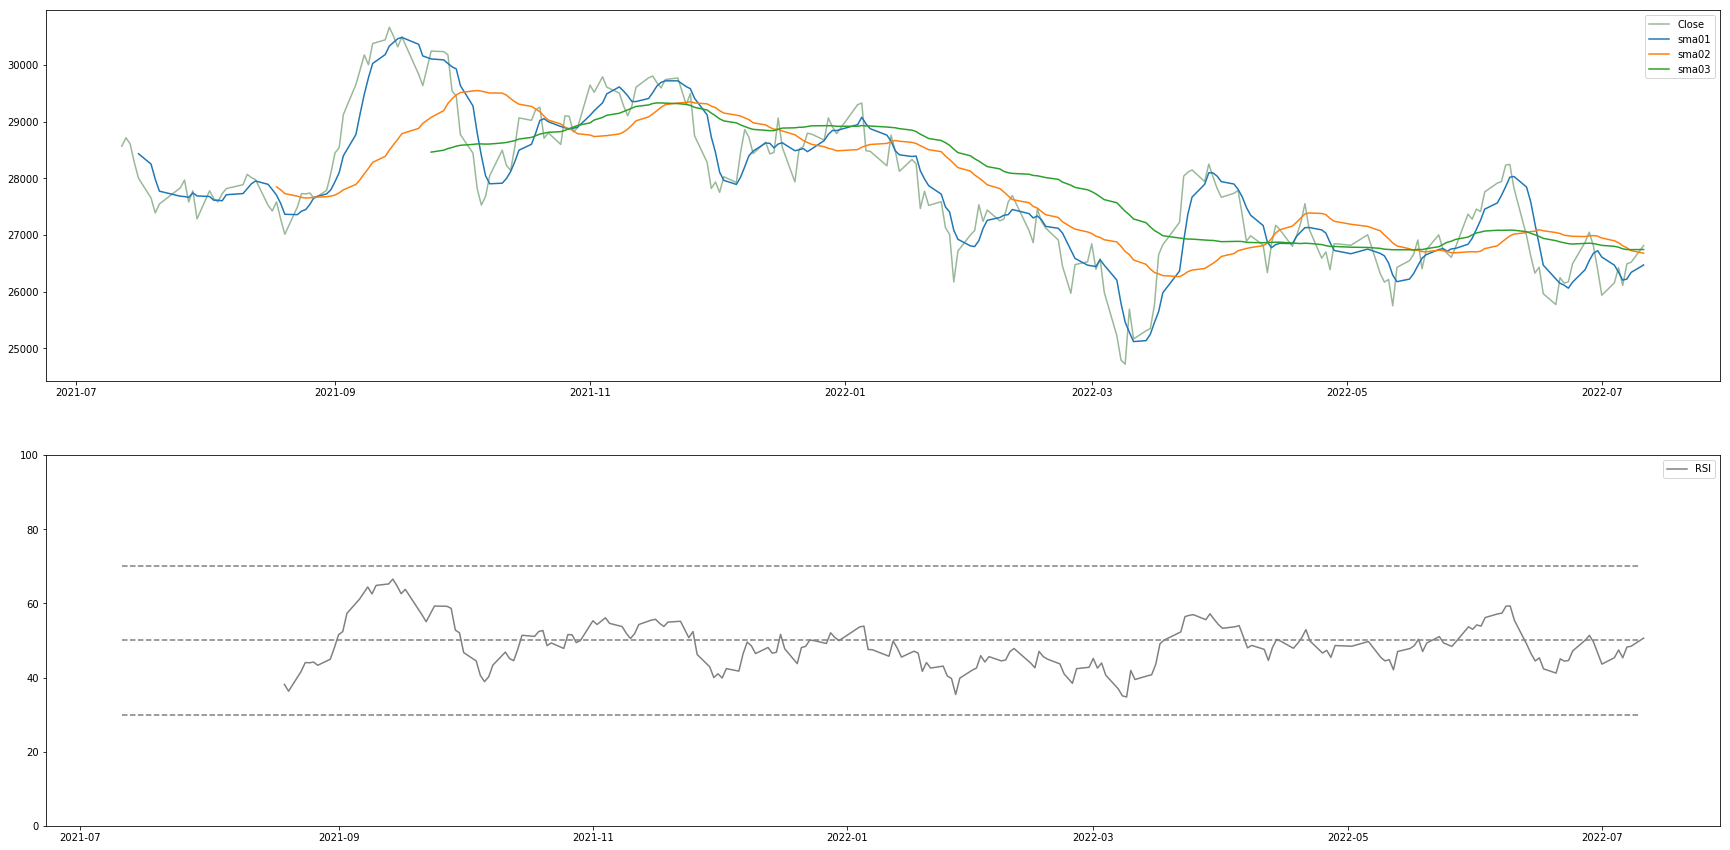

In [47]:
# グラフの描画
plt.figure(figsize=(30, 15))
# グラフ領域を2分割
plt.subplot(2, 1, 1)

plt.plot(date, close, label='Close', color='#99b898')
# smaを追加
plt.plot(date, df['sma01'], label='sma01')
plt.plot(date, df['sma02'], label='sma02')
plt.plot(date, df['sma03'], label='sma03')
plt.legend()

# RSIを描画
plt.subplot(2, 1, 2)
plt.plot(date, df['RSI'], label='RSI', color='gray')
plt.ylim(0, 100)
plt.hlines([30, 50, 70], st, ed, 'gray', linestyles='dashed')
plt.legend()

# ▼テニカル指標（ボリンジャーバンド）
- 移動平均などの一定期間の平均に対して、一定期間の標準偏差を足したものと引いたもの
- 一般的にプラスマイナス標準偏差の2倍を使う

In [56]:
# カラム作成
df['upper'], df['middle'], df['lower'] = ta.BBANDS(close, timeperiod=span02, nbdevup=2, nbdevdn=2, matype=0)

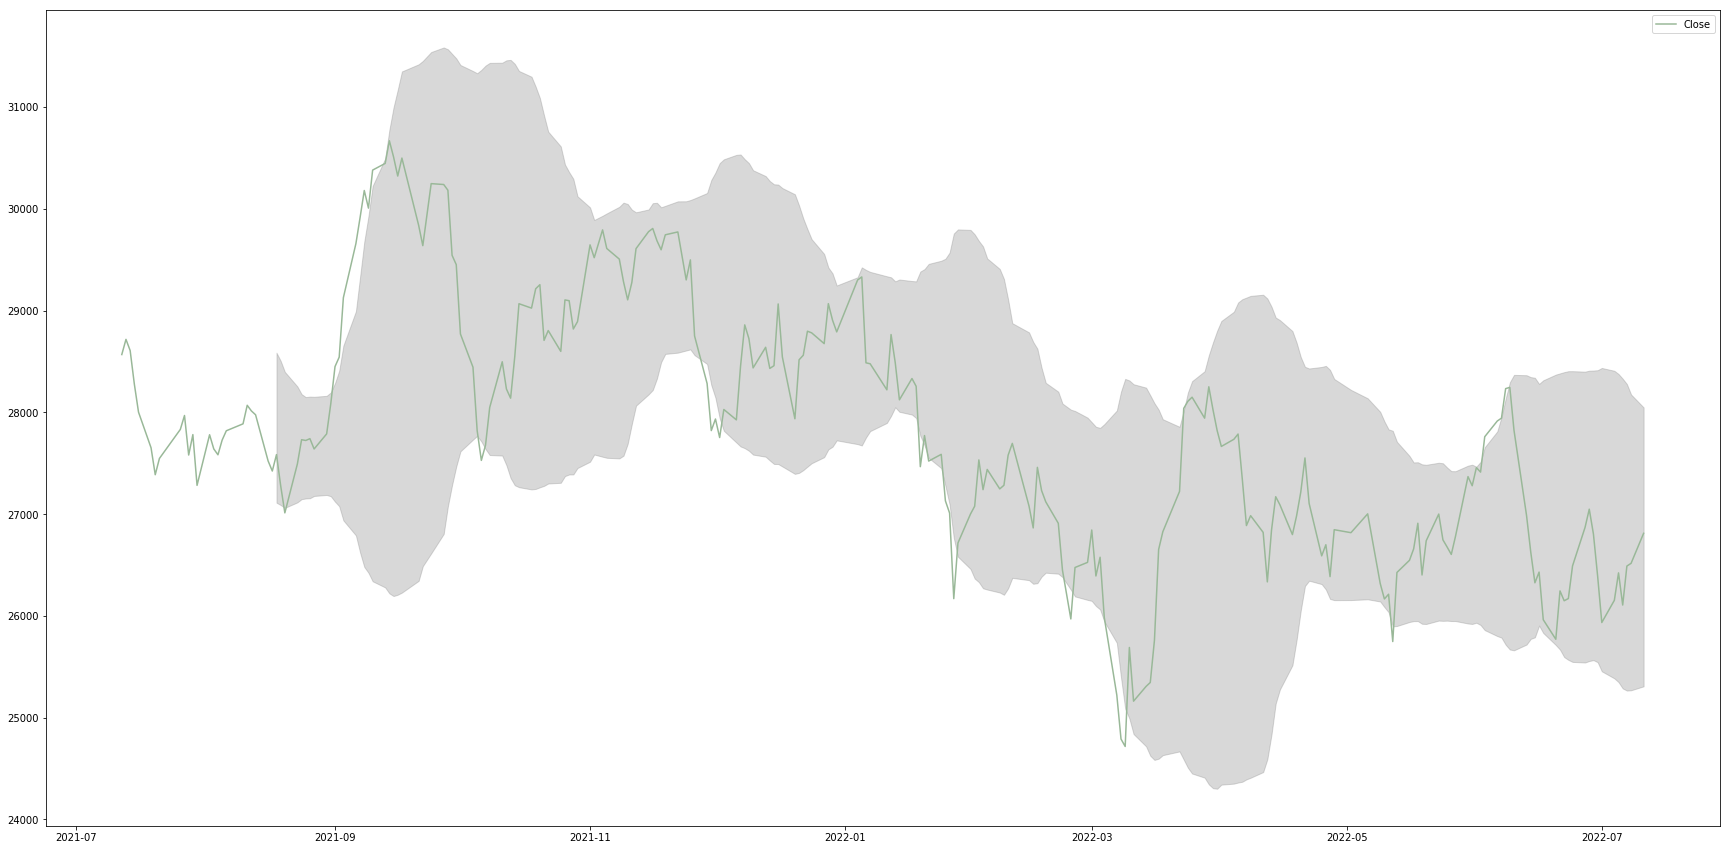

In [59]:
# ボリンジャーバンドの描画
plt.figure(figsize=(30, 15))
plt.plot(date, close, label='Close', color='#99b898')
plt.fill_between(date, df['upper'], df['lower'], color='gray', alpha=0.3)
plt.legend()

# ▼全ての指標の表示

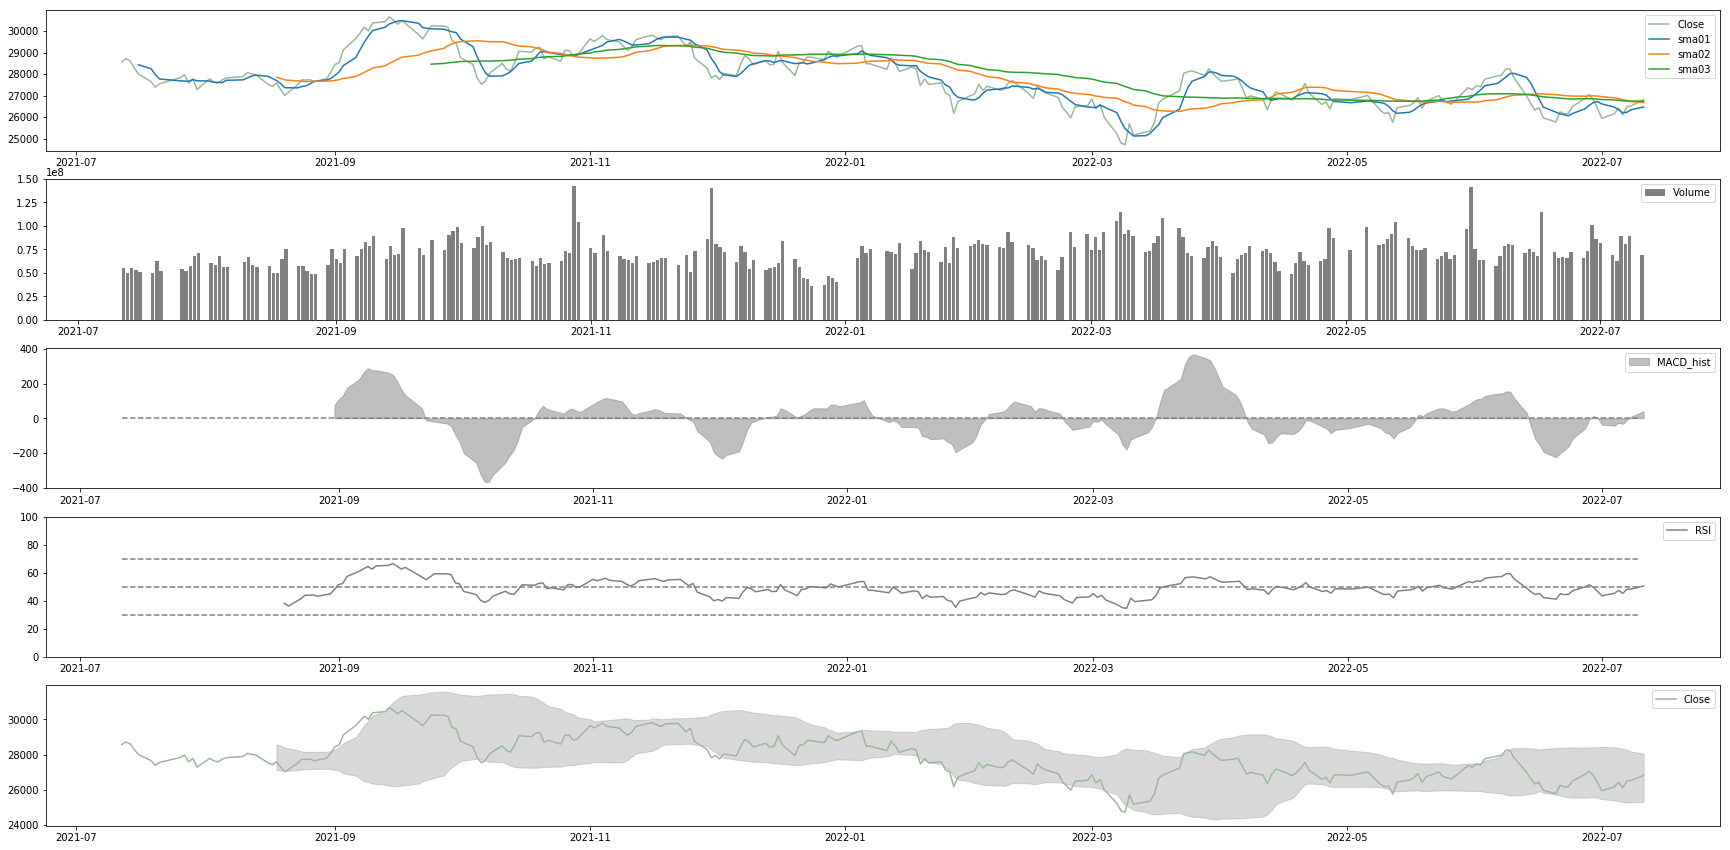

In [62]:
# グラフの描画
plt.figure(figsize=(30, 15))

# グラフを分割
plt.subplot(5, 1, 1)

plt.plot(date, close, label='Close', color='#99b898')
# smaを追加
plt.plot(date, df['sma01'], label='sma01')
plt.plot(date, df['sma02'], label='sma02')
plt.plot(date, df['sma03'], label='sma03')
plt.legend()

plt.subplot(5, 1, 2)
plt.bar(date, df['Volume'], label='Volume', color='gray')
plt.legend()

# MACDを描画
plt.subplot(5, 1, 3)
plt.fill_between(date, df['macdhist'], color = 'grey', alpha=0.5, label='MACD_hist')
plt.hlines(0, st, ed, 'gray', linestyles='dashed')
plt.legend()

# RSIを描画
plt.subplot(5, 1, 4)
plt.plot(date, df['RSI'], label='RSI', color='gray')
plt.ylim(0, 100)
plt.hlines([30, 50, 70], st, ed, 'gray', linestyles='dashed')
plt.legend()

# ボリンジャーバンドの描画
plt.subplot(5, 1, 5)
plt.plot(date, close, label='Close', color='#99b898')
plt.fill_between(date, df['upper'], df['lower'], color='gray', alpha=0.3)
plt.legend()

# ▼BitCoin（日本円とビットコイン）

In [63]:
# データの取得
df_bit = data.DataReader('BTC-JPY', 'yahoo', st, ed) 

In [65]:
# 今までの実行してきたテクニカル指標
# 後で関数化

# 変数の代入
date = df_bit.index
close = df_bit['Adj Close']

# 単純移動平均の指標を追加
# 変数の定義
span01 =  5
span02 = 25
span03 = 50

# 移動平均を算出
df_bit["sma01"] =  price.rolling(window=span01).mean()
df_bit["sma02"] =  price.rolling(window=span02).mean()
df_bit["sma03"] =  price.rolling(window=span03).mean()
df_bit['macd'], df_bit['macdsignal'], df_bit['macdhist'] = ta.MACD(close, 
                                                       fastperiod = 12, #短期の移動平均
                                                       slowperiod = 26, #長期の移動平均 
                                                       signalperiod = 9 #MACDシグナル
                                                       )
df_bit['RSI'] = ta.RSI(close, timeperiod=span02)
df_bit['upper'], df_bit['middle'], df_bit['lower'] = ta.BBANDS(close, timeperiod=span02, nbdevup=2, nbdevdn=2, matype=0)

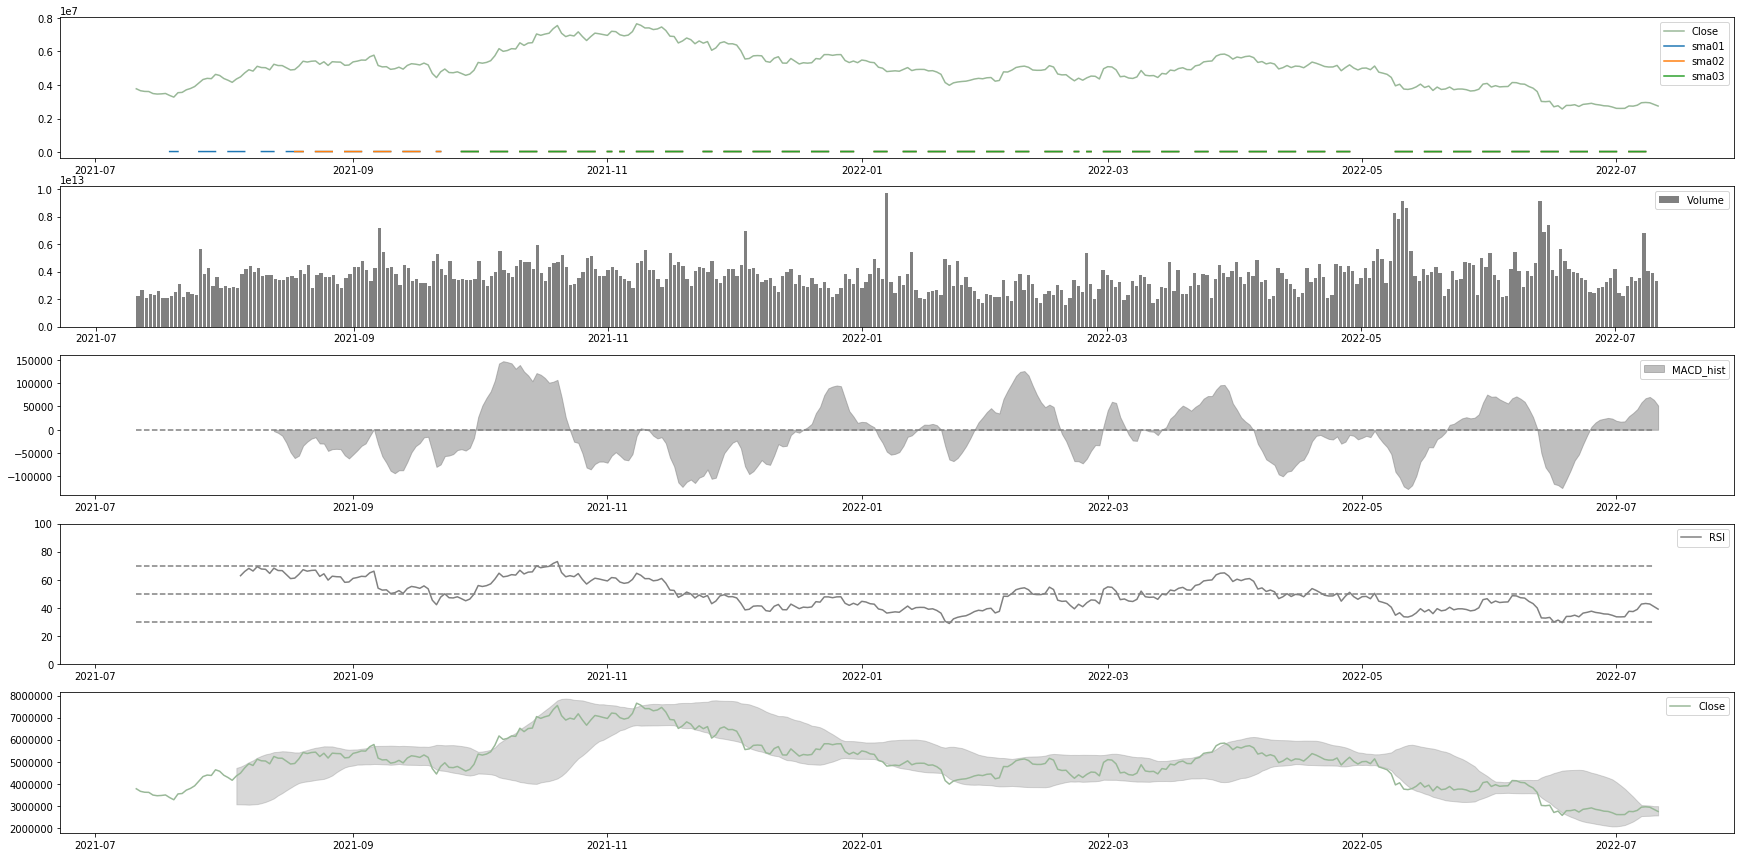

In [68]:
# 全ての指標を表示
# グラフの描画
plt.figure(figsize=(30, 15))

# グラフを分割
plt.subplot(5, 1, 1)

plt.plot(date, close, label='Close', color='#99b898')
# smaを追加
plt.plot(date, df_bit['sma01'], label='sma01')
plt.plot(date, df_bit['sma02'], label='sma02')
plt.plot(date, df_bit['sma03'], label='sma03')
plt.legend()

plt.subplot(5, 1, 2)
plt.bar(date, df_bit['Volume'], label='Volume', color='gray')
plt.legend()

# MACDを描画
plt.subplot(5, 1, 3)
plt.fill_between(date, df_bit['macdhist'], color = 'grey', alpha=0.5, label='MACD_hist')
plt.hlines(0, st, ed, 'gray', linestyles='dashed')
plt.legend()

# RSIを描画
plt.subplot(5, 1, 4)
plt.plot(date, df_bit['RSI'], label='RSI', color='gray')
plt.ylim(0, 100)
plt.hlines([30, 50, 70], st, ed, 'gray', linestyles='dashed')
plt.legend()

# ボリンジャーバンドの描画
plt.subplot(5, 1, 5)
plt.plot(date, close, label='Close', color='#99b898')
plt.fill_between(date, df_bit['upper'], df_bit['lower'], color='gray', alpha=0.3)
plt.legend()

# ▼ローソク足

In [72]:
df_candle =  df[['High', 'Low', 'Open', 'Close', 'Volume']]

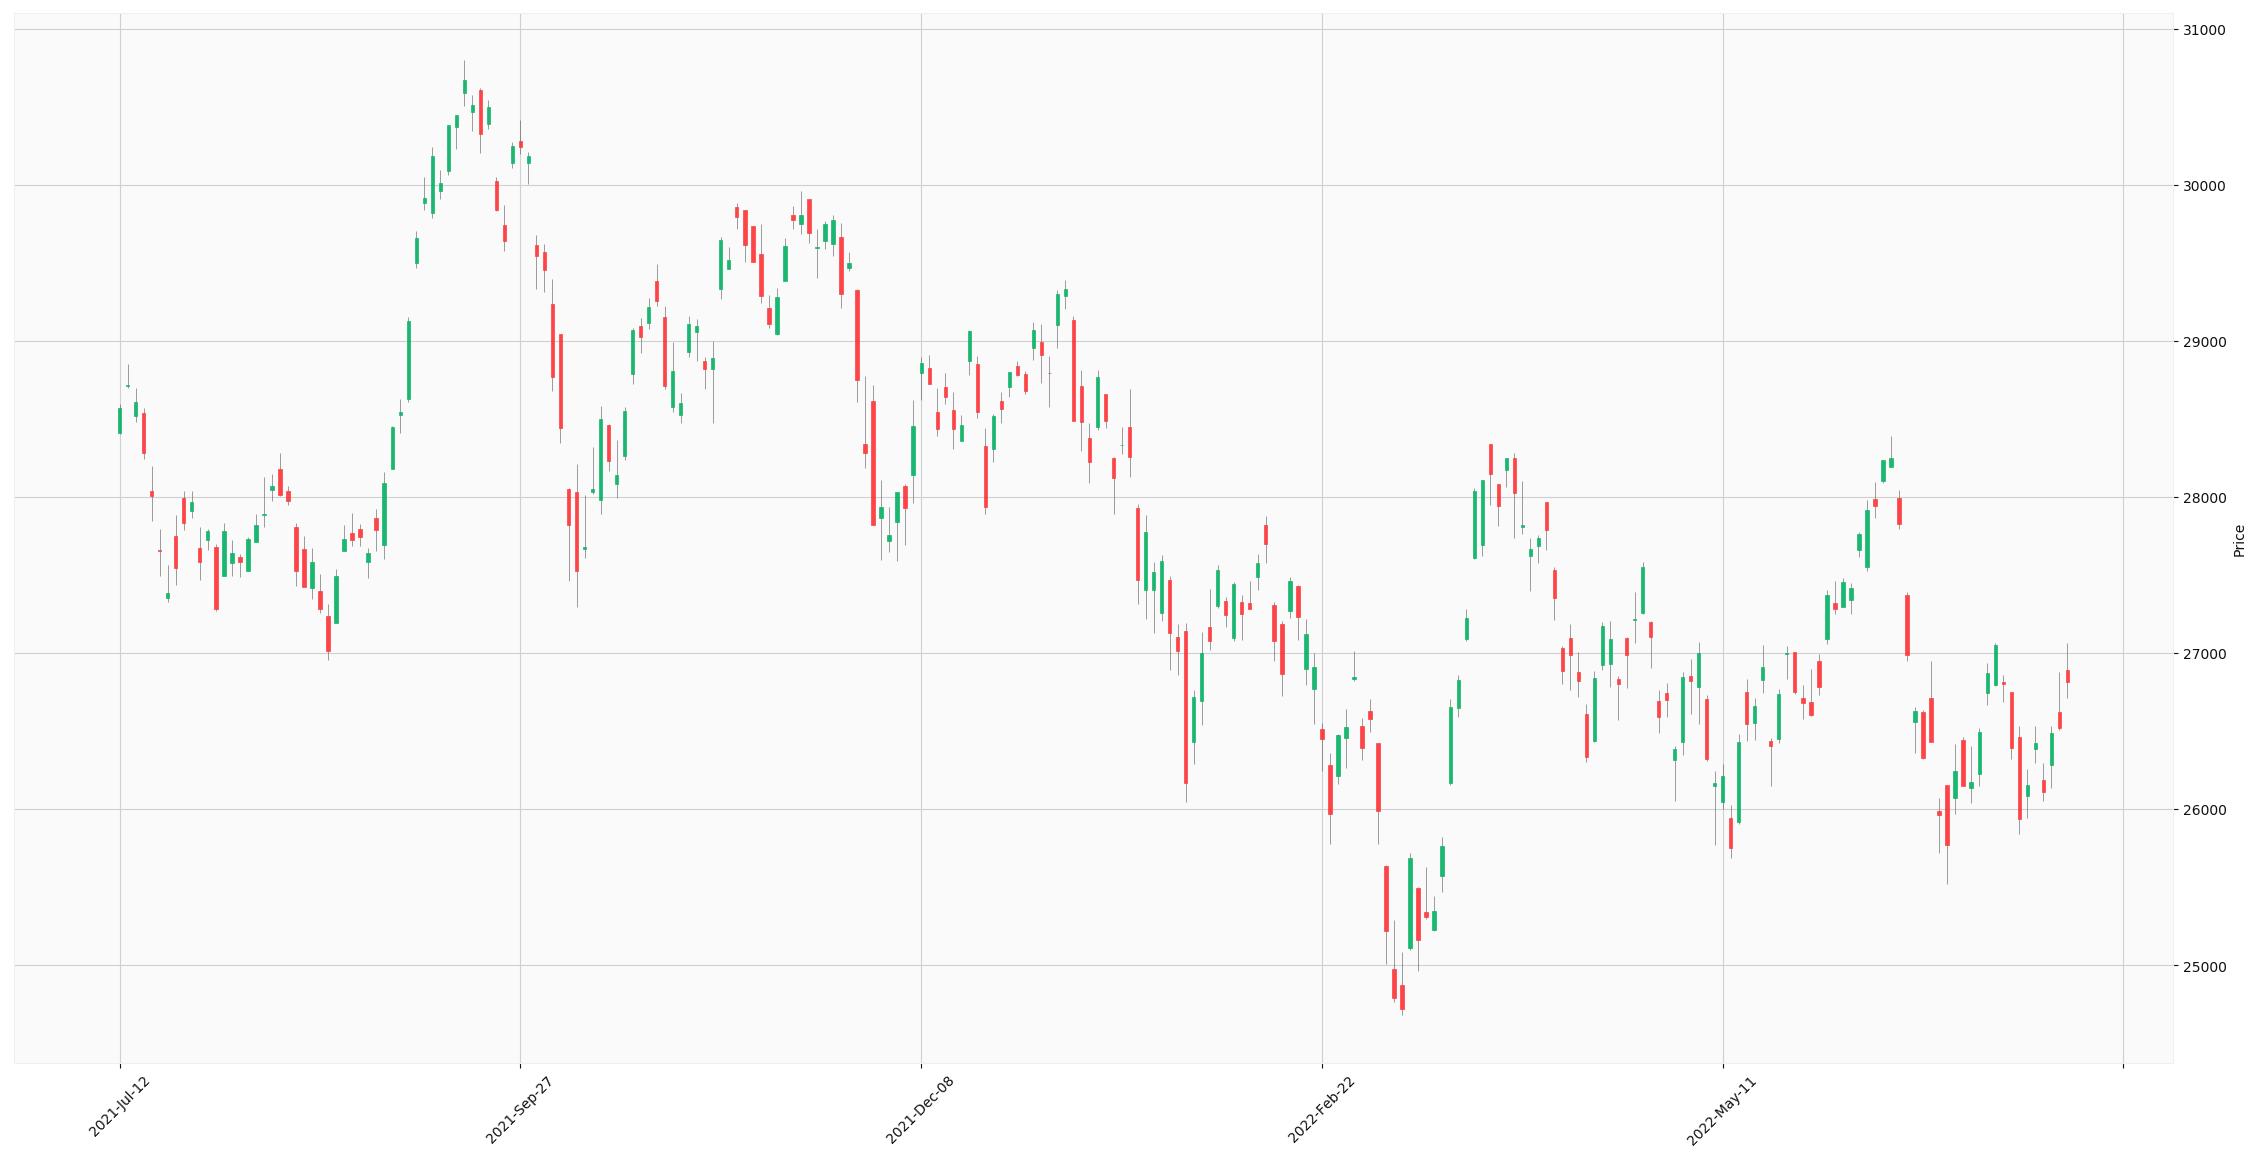

In [73]:
# ローソク足のグラフを描画
mpf.plot(df_candle, type='candle', style='yahoo', figsize=(30, 15))

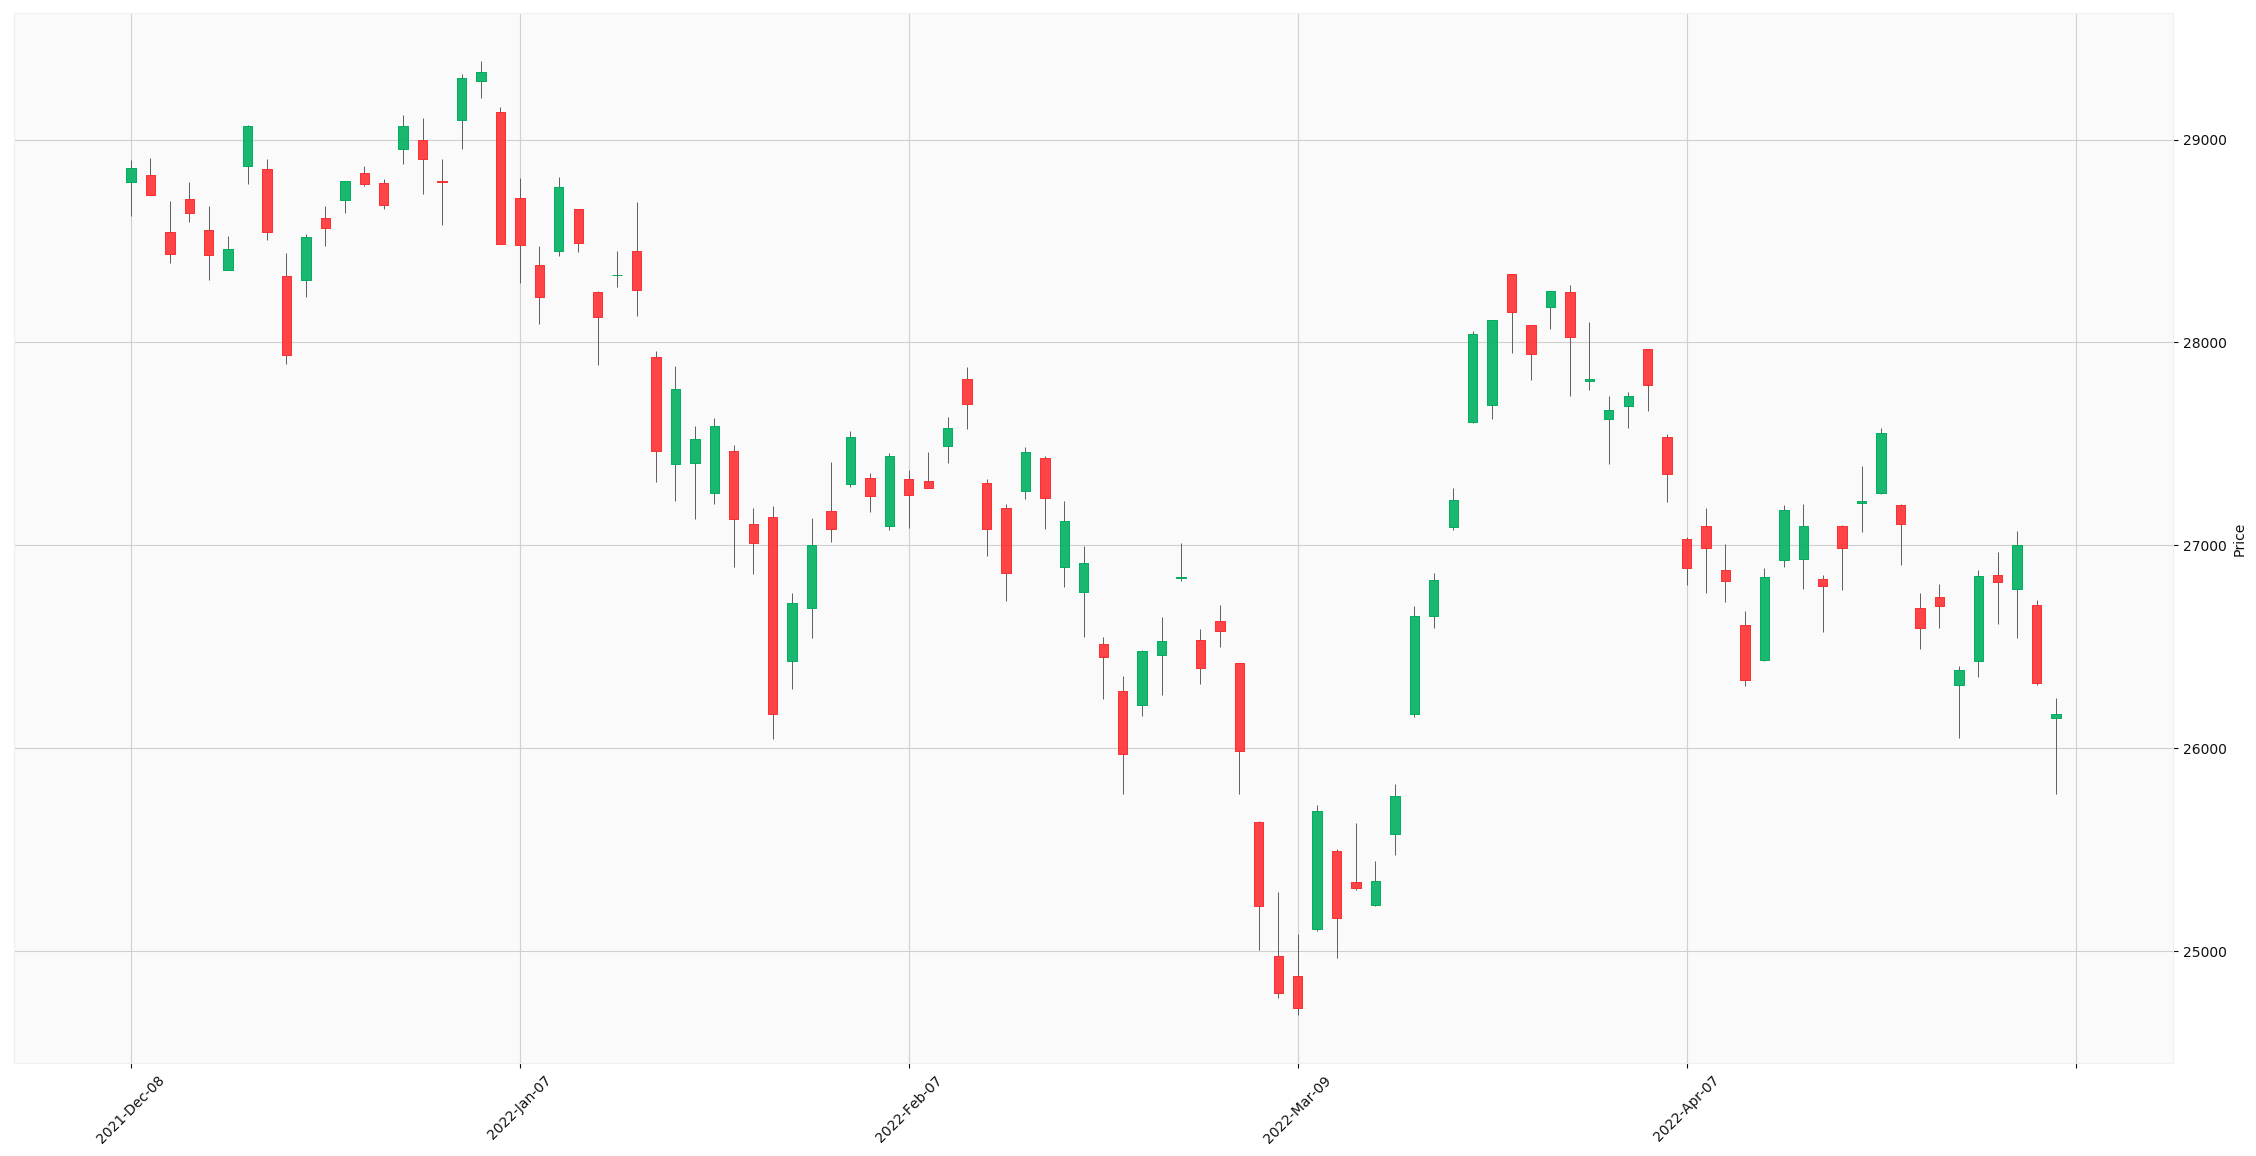

In [74]:
# データを絞ってローソク足のグラフを描画
mpf.plot(df_candle[100:200], type='candle', style='yahoo', figsize=(30, 15))

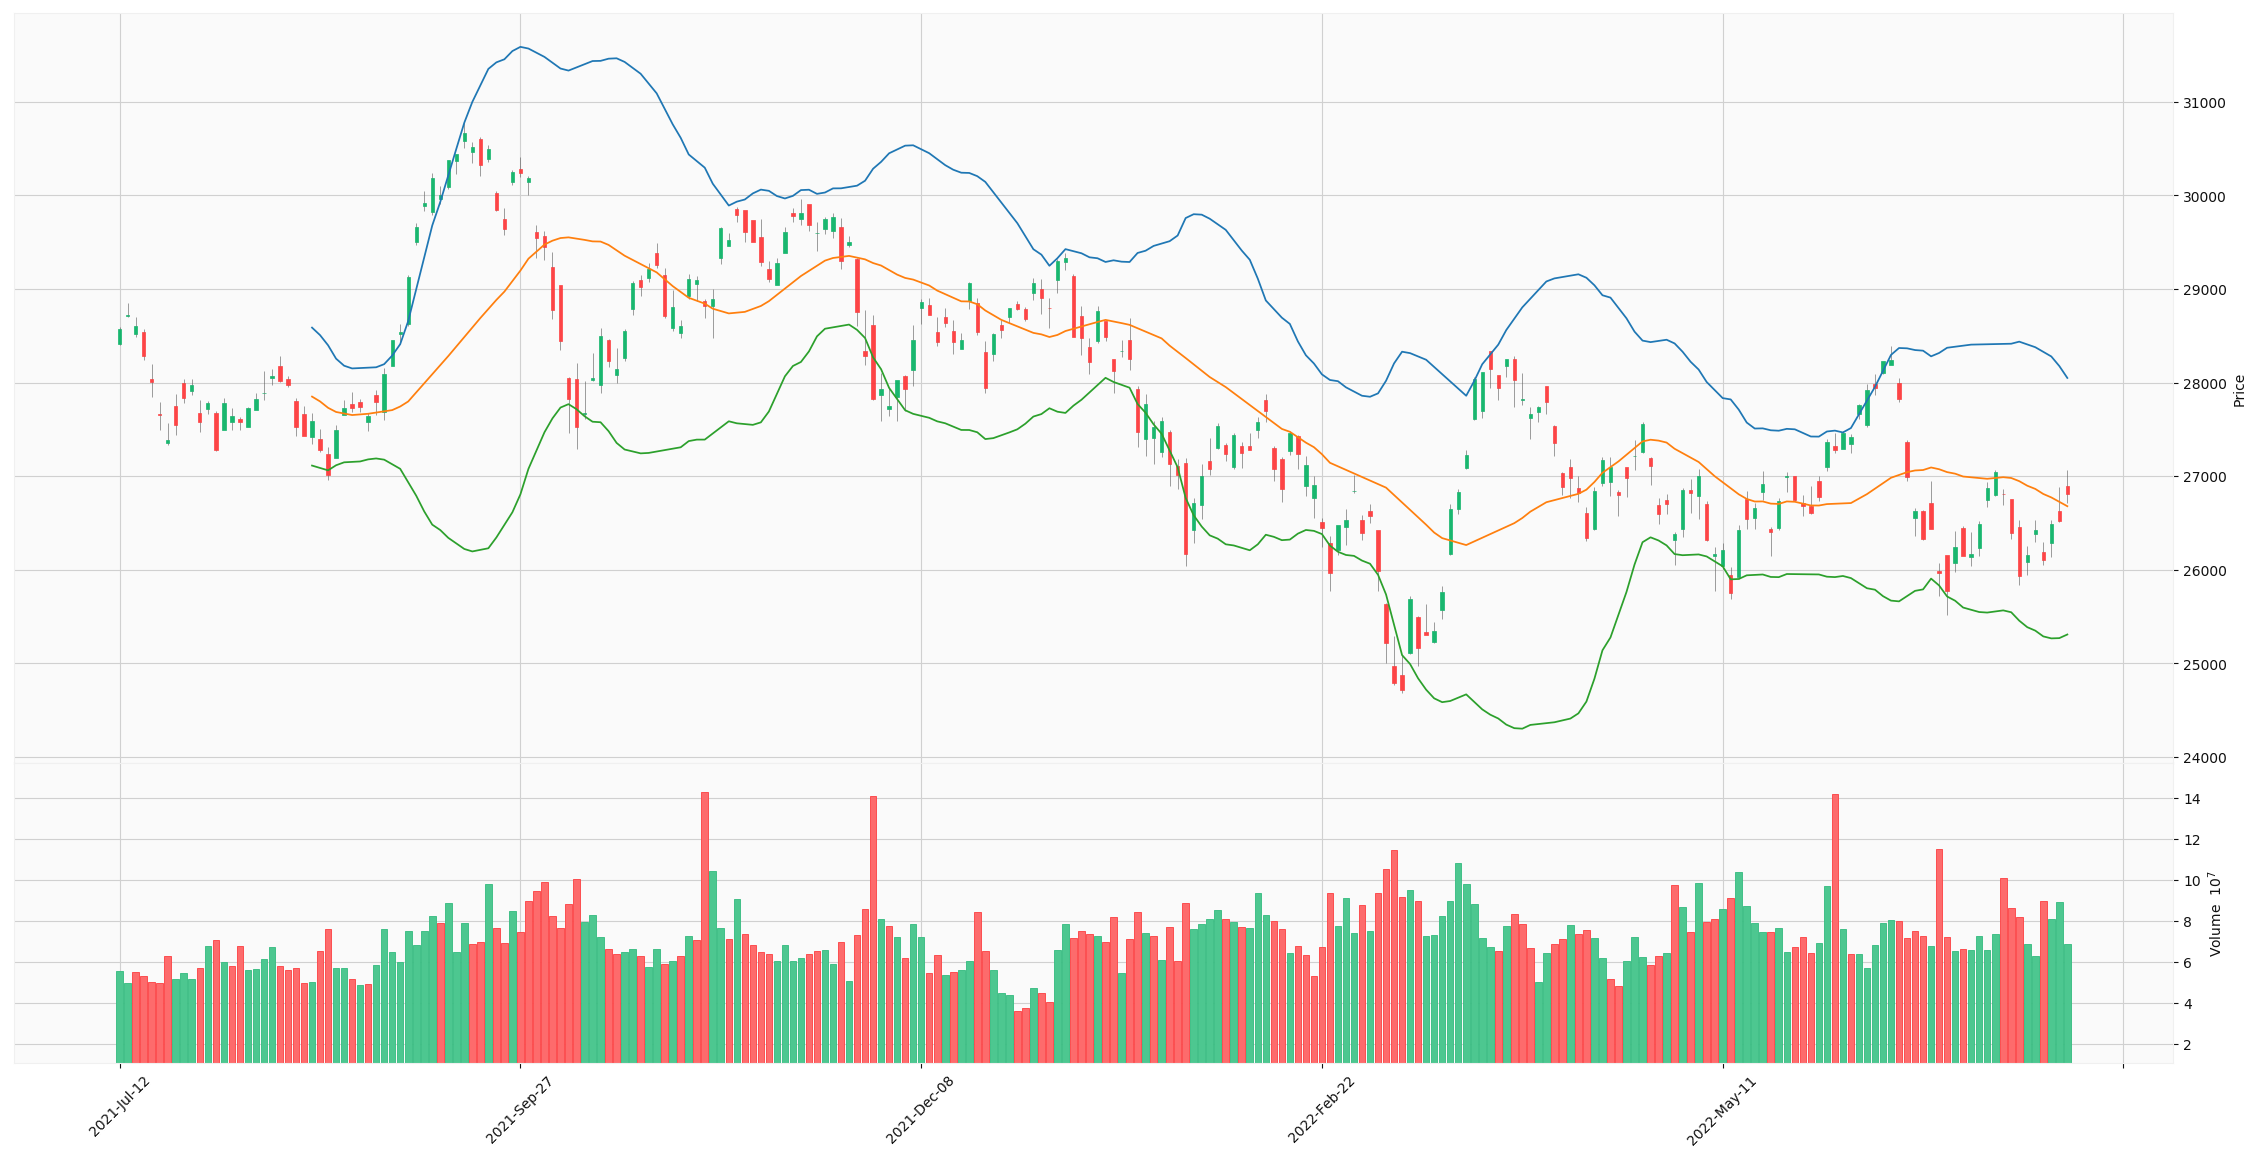

In [76]:
# ボリンジャーバンドと出来高を追加し描画
tcdf = df[['upper', 'middle', 'lower']]
apd = mpf.make_addplot(tcdf)

mpf.plot(df_candle, addplot=apd, type='candle', volume=True, style='yahoo', figsize=(30, 15))

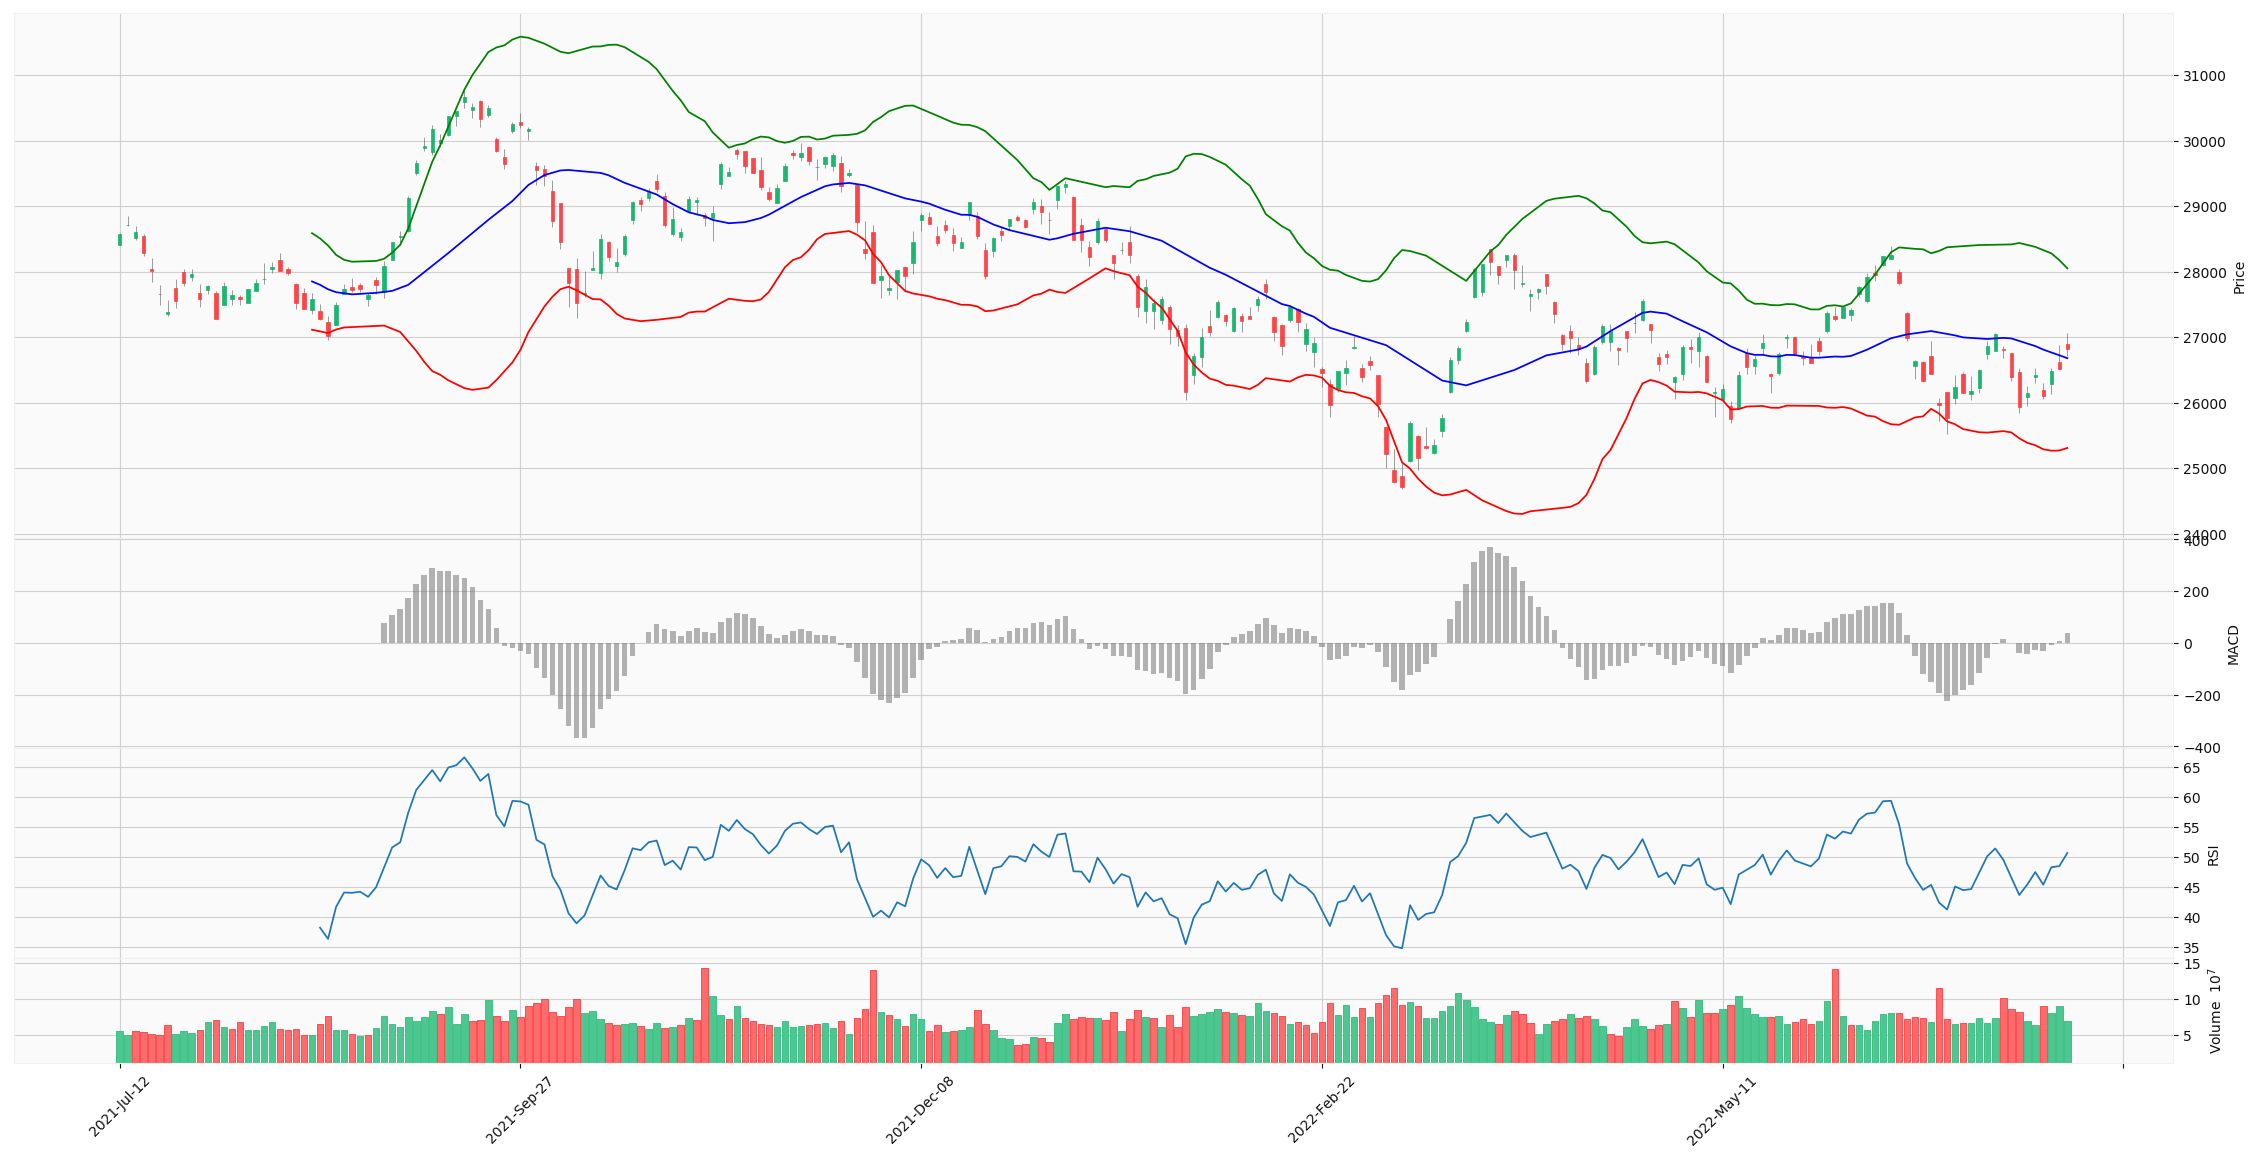

In [81]:
apds = [mpf.make_addplot(df['upper'],color='g'), #ボリンジャー
        mpf.make_addplot(df['middle'],color='b'),
        mpf.make_addplot(df['lower'],color='r'),
        mpf.make_addplot(df['macdhist'], type='bar', color='dimgray', #MACD
                         width=0.7, panel=1, alpha=0.5, ylabel='MACD'),
        mpf.make_addplot(df['RSI'], panel=2, type='line', ylabel='RSI')
       ]

mpf.plot(df, type='candle', figsize=(30, 15), style='yahoo', volume=True, addplot=apds, volume_panel=3, panel_ratios=(5,2,2, 1))

# ▼一目均衡表
- 基準線（過去26日間の最高値と最安値の平均を結んだ線）
- 転換線（過去9日間の最高値と最安値の平均を結んだ線）
- 先行スパン1（基準線と転換線の平均を結んだ線を26日分未来にずらした線）
- 先行スパン2（過去52日間の最高値と最安値の平均を結んだ線を26日分未来にずらした線）
- 雲（2つの先行スパンに挟まれた線）
- 遅行線（当日の終値を26日分過去にずらした線）

In [83]:
# 基準線に使用するデータの作成
high = df['High']
low = df['Low']

max26 =  high.rolling(window=26).max()
min26 =  low.rolling(window=26).min()

df['basic_line'] =  (max26 + min26) / 2

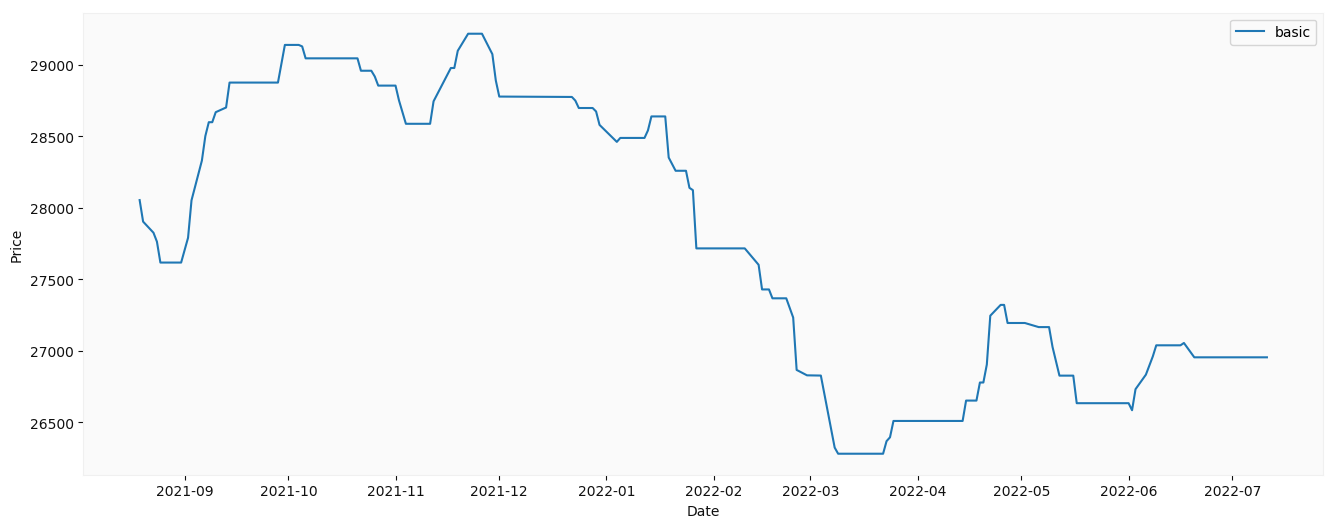

In [84]:
# 基準線を棒グラフで描画
plt.figure(figsize=(16, 6))
plt.plot(df['basic_line'], label='basic')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [86]:
# 転換線に使用するデータを作成
high9 =  high.rolling(window=9).max()
low9 =  low.rolling(window=9).min()

df['true_line'] = (high9 + low9) / 2

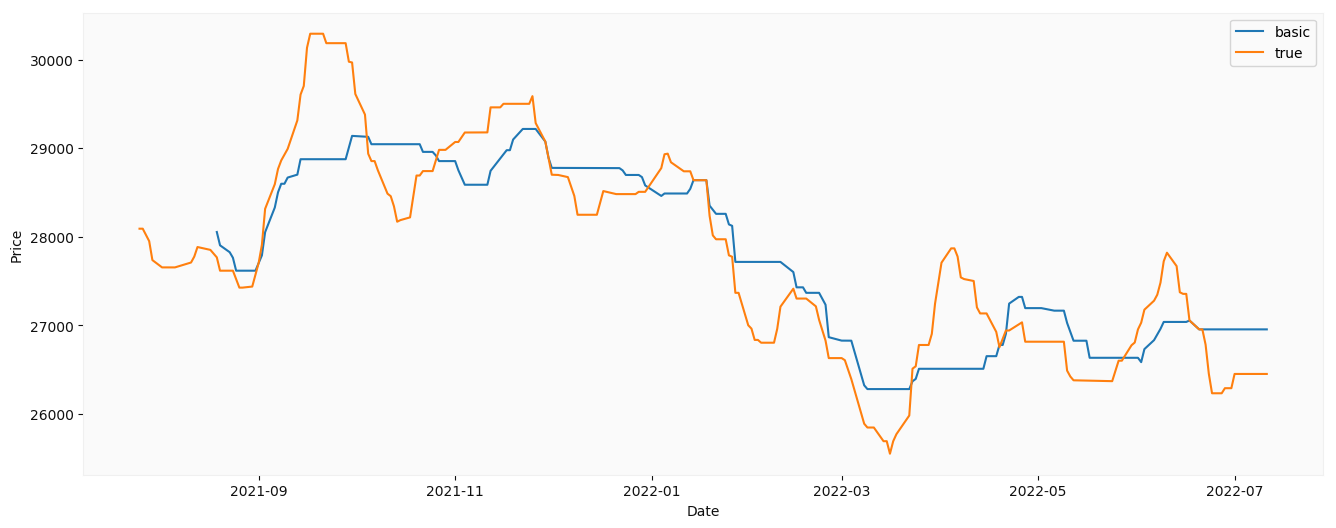

In [87]:
# 転換線を棒グラフで描画
plt.figure(figsize=(16, 6))
plt.plot(df['basic_line'], label='basic')
plt.plot(df['true_line'], label='true')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [96]:
# 先行スパン1のデータを作成
df['span1'] = (df['basic_line'] + df['true_line']) / 2

In [89]:
# 先行スパン2のデータを作成
high52 = high.rolling(window=52).max()
low52 = low.rolling(window=52).min()

df['span2'] = ( high52 + low52 )/ 2 

In [99]:
# 遅行線のデータを作成
df['slow_line'] = df['Adj Close'].shift(-25)

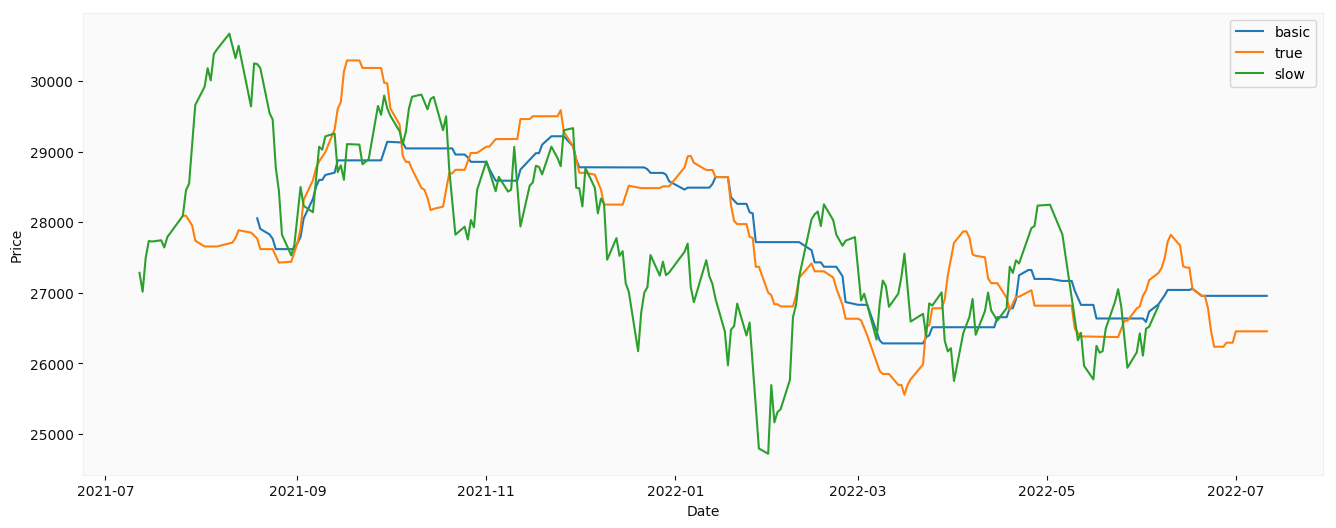

In [100]:
# 先行スパンを棒グラフで描画
plt.figure(figsize=(16, 6))
plt.plot(df['basic_line'], label='basic')
plt.plot(df['true_line'], label='true')
plt.plot(df['slow_line'], label='slow')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()